In [5]:
from model import *

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 56, 46)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1, 56, 46)]  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 50)           191618      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           sequential[1][0]             

In [9]:
def read_image(filename, byteorder='>'):
    
    #first we read the image, as a raw file to the buffer
    with open(filename, 'rb') as f:
        buffer = f.read()
    
    #using regex, we extract the header, width, height and maxval of the image
    header, width, height, maxval = re.search(
        b"(^P5\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    
    #then we convert the image to numpy array using np.frombuffer which interprets buffer as one dimensional array
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

(56, 46)
(56, 46)


array([[0.01727612]], dtype=float32)

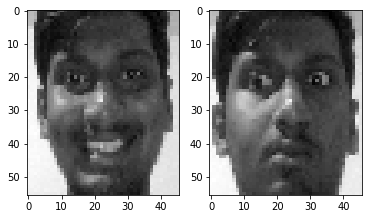

In [11]:
shu = read_image('att-database-of-faces/s40/1.pgm')
shu = cv2.resize(shu, (46,56))
print(shu.shape)
plt.subplot(1, 2, 1)
plt.imshow(shu, 'gray')

img2 = plt.imread("C:/Users/hp/Desktop/facerec/image92.png")
img2 = cv2.resize(img2, (46,56))
print(img2.shape)
plt.subplot(1,2,2)
plt.imshow(img2, 'gray')

pred = model.predict([shu.reshape(1,1,56,46)/255, img2.reshape(1,1,56,46)])
pred#[i]

In [26]:
import os
img_db = np.zeros((20, 56, 46))
images = os.listdir('att-database-of-faces/s40/')
for i in range(10):
    shu = read_image('att-database-of-faces/s40/'+images[i])
    shu = cv2.resize(shu, (46,56))
    img_db[i] = shu
    
print(img_db.shape)

(20, 56, 46)


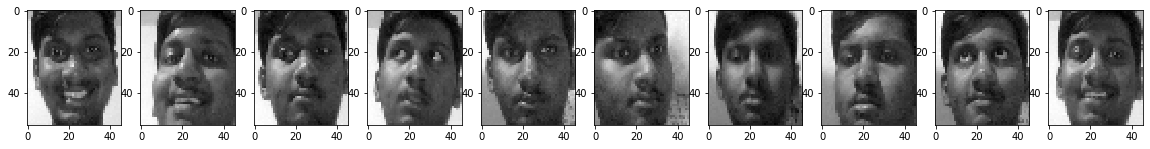

In [29]:
plt.figure(figsize=(20,10))
for i in range(1,11):
    plt.subplot(1,10,i)
    plt.imshow(img_db[i-1], 'gray')

In [31]:
images = os.listdir('att-database-of-faces/s39/')
for i in range(10,20):
    jhal = read_image('att-database-of-faces/s39/'+images[i-10])
    jhal = cv2.resize(jhal, (46,56))
    img_db[i] = jhal
    
print(img_db.shape)

(20, 56, 46)


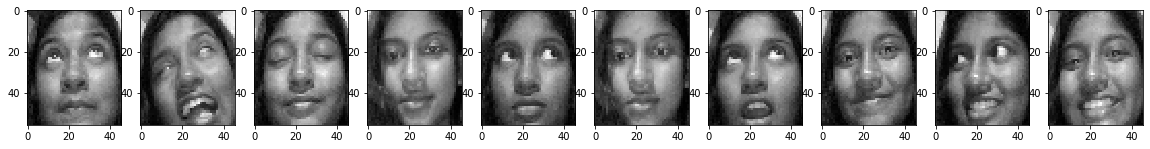

In [33]:
plt.figure(figsize=(20,10))
for i in range(11,21):
    plt.subplot(1,10,i-10)
    plt.imshow(img_db[i-1], 'gray')

(56, 46)
(56, 46)


array([[0.6268125]], dtype=float32)

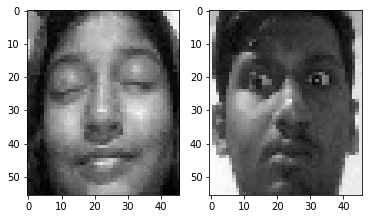

In [38]:
shu = img_db[12]
shu = cv2.resize(shu, (46,56))
print(shu.shape)
plt.subplot(1, 2, 1)
plt.imshow(shu, 'gray')

img2 = plt.imread("C:/Users/hp/Desktop/facerec/image92.png")
img2 = cv2.resize(img2, (46,56))
print(img2.shape)
plt.subplot(1,2,2)
plt.imshow(img2, 'gray')

pred = model.predict([shu.reshape(1,1,56,46)/255, img2.reshape(1,1,56,46)])
pred#[i]

In [46]:
img2 = plt.imread("C:/Users/hp/Desktop/facerec/image95.png")
img2 = cv2.resize(img2, (46,56))
n, w, h = img_db.shape
values = []
for i in range(n//10):
    r = np.random.randint(i*10, i*10+10)
    values.append(model.predict([img_db[r].reshape(1,1,56,46)/255, img2.reshape(1,1,56,46)]))

In [47]:
np.argmin(values)

1

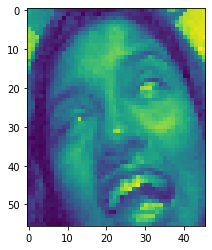

In [48]:
plt.imshow(img2)

(56, 46)
(56, 46)


array([[0.00817878]], dtype=float32)

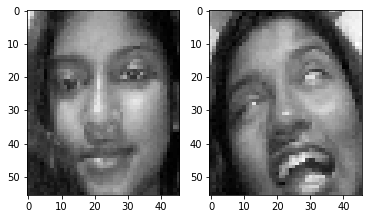

In [12]:
jhal = read_image('att-database-of-faces/s39/3.pgm')
jhal = cv2.resize(jhal, (46,56))
print(jhal.shape)
plt.subplot(1, 2, 1)
plt.imshow(jhal, 'gray')

img3 = plt.imread("C:/Users/hp/Desktop/facerec/image95.png")
img3 = cv2.resize(img3, (46,56))
print(img3.shape)
plt.subplot(1,2,2)
plt.imshow(img3, 'gray')

pred = model.predict([jhal.reshape(1,1,56,46)/255, img3.reshape(1,1,56,46)])
pred#[i]

In [13]:
pred = model.predict([jhal.reshape(1,1,56,46)/255, img3.reshape(1,1,56,46)])
pred#[i]

array([[0.00817878]], dtype=float32)

array([[0.62437105]], dtype=float32)

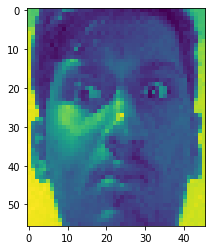

In [15]:
plt.imshow(img2)
pred = model.predict([jhal.reshape(1,1,56,46)/255, img2.reshape(1,1,56,46)])
pred#[i]

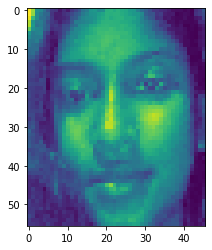

In [16]:
plt.imshow(jhal)

In [19]:
img5 = plt.imread("C:/Users/hp/Desktop/facerec/image92.png")

In [20]:
img5

array([[0.6431373 , 0.64705884, 0.6431373 , ..., 0.6039216 , 0.6039216 ,
        0.6039216 ],
       [0.6431373 , 0.64705884, 0.6431373 , ..., 0.60784316, 0.6039216 ,
        0.60784316],
       [0.64705884, 0.64705884, 0.6392157 , ..., 0.60784316, 0.6039216 ,
        0.60784316],
       ...,
       [0.827451  , 0.83137256, 0.8352941 , ..., 0.78039217, 0.7882353 ,
        0.7882353 ],
       [0.827451  , 0.83137256, 0.827451  , ..., 0.78431374, 0.7921569 ,
        0.7882353 ],
       [0.8392157 , 0.8352941 , 0.83137256, ..., 0.78431374, 0.7921569 ,
        0.7882353 ]], dtype=float32)

In [49]:
img_db = np.array(img_db, dtype = np.uint8)

In [52]:
np.save('image_database.npy', img_db)